In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("us events ad_revenue filtered 03.02-07.02.csv")

In [3]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [4]:
data.shape

(860079, 16)

In [5]:
data.columns

Index(['profile_id', 'os_version', 'device_manufacturer', 'device_model',
       'device_type', 'device_locale', 'event_name', 'event_json',
       'event_datetime', 'event_timestamp', 'event_receive_datetime',
       'event_receive_timestamp', 'connection_type', 'operator_name',
       'country_iso_code', 'city'],
      dtype='object')

In [6]:
data.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

<AxesSubplot:>

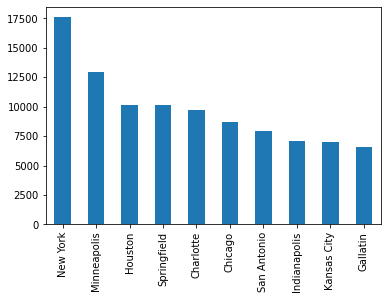

In [7]:
data.city.value_counts().head(10).plot.bar()

<AxesSubplot:>

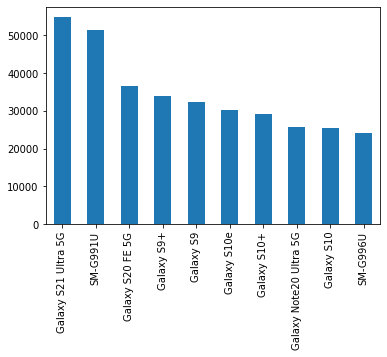

In [8]:
data.device_model.value_counts().head(10).plot.bar()

<AxesSubplot:>

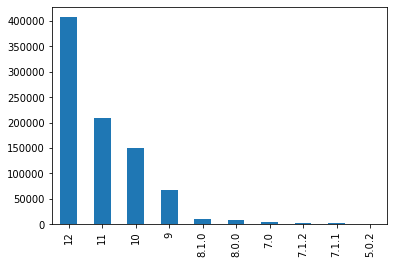

In [9]:
data.os_version.value_counts().head(10).plot.bar()

<AxesSubplot:>

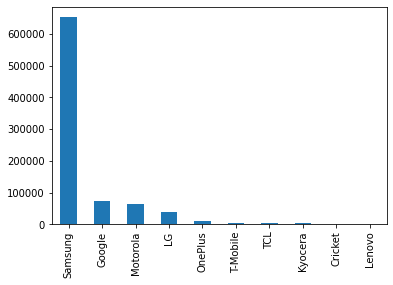

In [10]:
data.device_manufacturer.value_counts().head(10).plot.bar()

In [11]:
data2 = data.copy(deep=True)

In [12]:
data2["ad_type"] = 0
data2["ad_placement"] = 0
data2["eCPM"] = 0
data2["ad_network_name"] = 0

In [13]:
data2.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,ad_placement,eCPM,ad_network_name
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0,0,0,0
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0,0,0,0
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,0,0,0,0
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,0,0,0,0
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,0,0,0,0


## я использовал довольно интересный способ получение информации из json

я содал копию оригинального датафрейма и добавил к нему дополнительный столбцы из данных в json

In [14]:
re.split('[,:]',data.event_json[2][1:-1])

['"ad_type"',
 '"banner"',
 '"placement"',
 '""',
 '"view_index"',
 '1',
 '"session_view_index"',
 '0',
 '"cur_ticks"',
 '637796515863735930',
 '"session_length"',
 '431.8129',
 '"revenue"',
 '0.0023861625',
 '"ads_ltv"',
 '0.67847875732725',
 '"ecpm_sma"',
 '0.928597450256348',
 '"normalized_ecpm_sma"',
 '0.928597450256348',
 '"value"',
 '0.0023861625',
 '"currency"',
 '"USD"',
 '"ad_country_code"',
 '"US"',
 '"network_name"',
 '"APPLOVIN_EXCHANGE"',
 '"ad_unit_id"',
 '"64c6b1114ea8c1cc"',
 '"ad_network_placement"',
 '"banner_regular"',
 '"creativeId"',
 '"pandora-58"']

In [15]:
for i in range(len(data)):
    js = re.split('[,:]',data.event_json[i][1:-1])
    data2["ad_type"][i] = js[1]
    data2["ad_placement"][i] = js[3]
    data2["eCPM"][i] = float(js[13])*1000
    data2["ad_network_name"][i] = js[27]

In [16]:
data2.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,ad_placement,eCPM,ad_network_name
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,"""banner""","""""",0.510313,"""Google AdMob"""
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,"""banner""","""""",0.510313,"""Google AdMob"""
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,"""banner""","""""",2.386163,"""APPLOVIN_EXCHANGE"""
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,"""int""","""next_level""",13.893784,"""AppLovin"""
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,"""banner""","""""",6.827570,"""Google AdMob"""


In [17]:
data2["profile_id"].value_counts()

JL5pmKYe8g7    8486
JLTfZhBE0e3    6571
JL4p0t068V1    5646
JLnrqVfS2Fn    5046
JLxjvw18Qg0    4934
               ... 
JLm6svXrHwU       1
JLytQqxhsuN       1
JLwa1Kxkn6k       1
JMEFrO5FntC       1
JLgvPJq1sOV       1
Name: profile_id, Length: 4226, dtype: int64

In [18]:
data2['eCPM'].describe()

count    860079.000000
mean          2.779743
std          15.128594
min           0.000000
25%           0.046083
50%           0.494196
75%           0.533385
max         937.195984
Name: eCPM, dtype: float64

<AxesSubplot:ylabel='Frequency'>

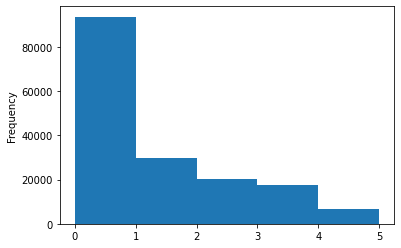

In [19]:
np.log(data2['eCPM']).plot.hist(bins = range(0,6,1))

In [20]:
data2.groupby(['profile_id'])['eCPM'].mean().value_counts().head(10)

58.480000     45
191.400000    32
66.480000     30
2.386163      30
20.160000     22
131.000000    21
23.160000     21
36.382125     12
0.637500      11
38.240770     11
Name: eCPM, dtype: int64

<AxesSubplot:>

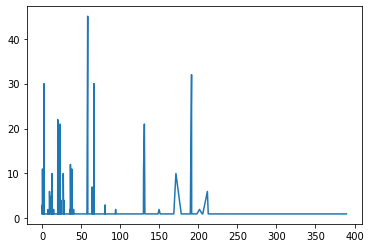

In [34]:
data2.groupby(['profile_id'])['eCPM'].mean().value_counts().sort_index().plot.line()

In [22]:
data2.groupby(['city','os_version'])['eCPM'].mean().value_counts().head(10)

58.480000     8
2.386163      6
64.184865     6
191.400000    5
130.000000    5
20.160000     5
23.160000     4
66.480000     4
36.382125     3
131.000000    3
Name: eCPM, dtype: int64

<AxesSubplot:>

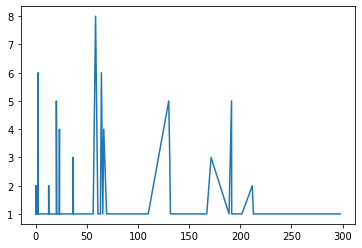

In [23]:
data2.groupby(['city','os_version'])['eCPM'].mean().value_counts().sort_index().plot.line()

In [24]:
data2['profile_id']

0         JLjpGzDHBQm
1         JLjpGzDHBQm
2         JLkVacrzHY6
3         JMC6wG3cX0f
4         JLzWWTJfi1b
             ...     
860074    JLSQY2nx1NQ
860075    JLKWwju79CA
860076    JLKWwju79CA
860077    JLKWwju79CA
860078    JLKWwju79CA
Name: profile_id, Length: 860079, dtype: object

In [25]:
data2['eCPM']

0          0.510313
1          0.510313
2          2.386163
3         13.893784
4          6.827570
            ...    
860074     0.019972
860075     6.740355
860076     2.780058
860077     2.780058
860078     2.780058
Name: eCPM, Length: 860079, dtype: float64

In [35]:
data2.groupby(['city','os_version'])['eCPM'].mean().head(15)

city         os_version
Aberdeen     11              1.299824
Abilene      10             44.931246
             11            191.400000
             9               5.121368
Addison      12              0.142235
Afton        11              2.153271
Akron        10            201.550000
             12             58.480000
             9               6.916873
Alameda      12              1.601408
Alamogordo   10              0.098182
             9               1.060883
Albany       11              5.412108
             12              3.665899
Albuquerque  10              4.879248
Name: eCPM, dtype: float64

<AxesSubplot:>

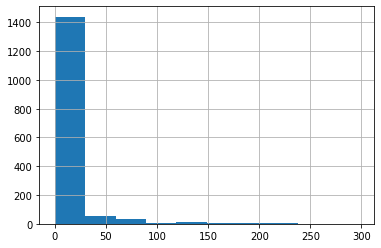

In [27]:
data2.groupby(['city','os_version'])['eCPM'].mean().hist()

<AxesSubplot:xlabel='eCPM', ylabel='Density'>

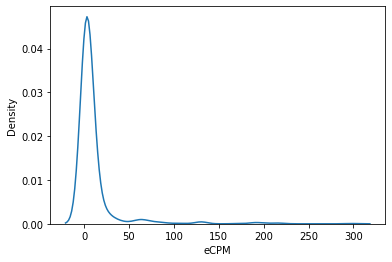

In [58]:
sns.kdeplot(data2.groupby('city')['eCPM'].mean())

<AxesSubplot:xlabel='eCPM', ylabel='Density'>

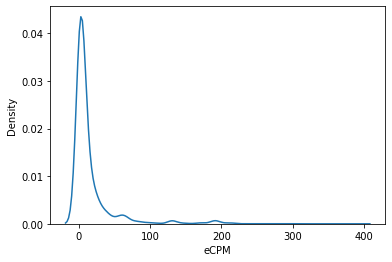

In [57]:
sns.kdeplot(data2.groupby(['profile_id'])['eCPM'].mean())

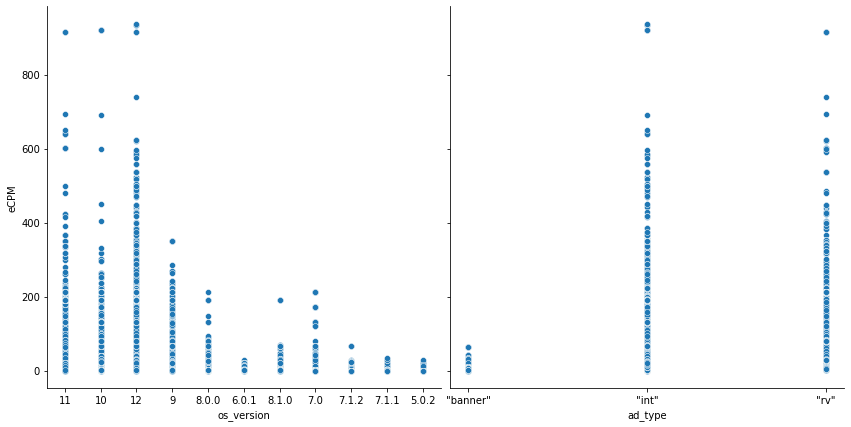

In [68]:
sns.pairplot(
    data2,
    x_vars=["os_version", "ad_type"],
    y_vars=["eCPM"],
    size = 6,
)

# Результаты

В результате анализа можно увидеть что полноэкранная реклама и видео реклама являются эфективнее чем баннеры, так как приносят больше дохода. А из операционных систем 10, 11 и 12, потому что большинство игроков используют телефоны последних моделей, преимущественно Samsung. Больше всего прибыли с больших городов с высоким населением.

## Также

По распределению eCPM можно увидеть что его среднее значение это 2.779743. Есть аномальный случай со значением 937.195984. 

# Дополнительно

In [86]:
len(data["city"][data2["city"].notna()==True])/len(data["city"])*100

62.36299223675965

62.36% доходов содержит информацию о городе юзера

In [97]:
data2["event_datetime"] = pd.to_datetime(data2["event_datetime"])

In [103]:
data2["day_time"] = 0

In [122]:
data2.loc[(data2["event_datetime"].dt.hour >= 18) & (data2["event_datetime"].dt.hour < 24), "day_time"] = "evening"
data2.loc[(data2["event_datetime"].dt.hour < 18) & (data2["event_datetime"].dt.hour >= 12), "day_time"] = "day"
data2.loc[(data2["event_datetime"].dt.hour < 12) & (data2["event_datetime"].dt.hour >= 6), "day_time"] = "morning"
data2.loc[(data2["event_datetime"].dt.hour < 6) & (data2["event_datetime"].dt.hour >= 0), "day_time"] = "night"

In [123]:
data2.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,...,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,ad_placement,eCPM,ad_network_name,day_time
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,...,1644159499,wifi,NaN,US,Norwalk,"""banner""","""""",0.510313,"""Google AdMob""",evening
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,...,1644159499,wifi,NaN,US,Norwalk,"""banner""","""""",0.510313,"""Google AdMob""",evening
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,...,1644155969,wifi,Verizon,US,Charlotte,"""banner""","""""",2.386163,"""APPLOVIN_EXCHANGE""",day
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,...,1644156564,wifi,T-Mobile,US,Cocoa,"""int""","""next_level""",13.893784,"""AppLovin""",day
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,...,1644156976,cell,Verizon,US,NaN,"""banner""","""""",6.827570,"""Google AdMob""",day


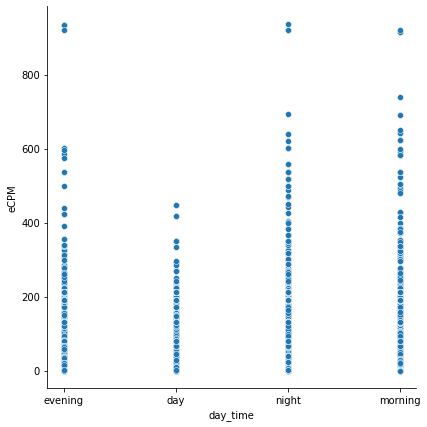

In [124]:
sns.pairplot(
    data2,
    x_vars=["day_time"],
    y_vars=["eCPM"],
    size = 6,
)

eCMP зависит от времени дня. На полученном графике можно увидеть что в основном люди играют с вечера(18:00) до утра(6:00)